<a href="https://www.kaggle.com/code/ksenia5/sentiment-analysis-with-nltk-and-sklearn?scriptVersionId=111844262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#### Sentiment Analysis with NLTK and ScikitLearn: movie reviews and tweets
Sentiment analysis on movie reviews and tweets is performed using the NLTK datasets:
* movie_review corpus
* twitter_samples corpus
For each dataset, perform sentiment analysis using:
1. NLTK's pre-trained built-in sentiment analyser
2. Customised NLTK classifier
3. ScikitLearn classifiers
4. Compare the performance and results of all three methods

[Sentiment Analysis: First Steps With Python's NLTK Library](https://realpython.com/python-nltk-sentiment-analysis/) tutorial on RealPython is used as a guide.

In [1]:
# Language resources from NLTK
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(["names",
               "stopwords",
               "twitter_samples",
               "movie_reviews",
               "averaged_perceptron_tagger",
               "vader_lexicon",
               "punkt"
              ])

# Sklearn ML Classifiers
import sklearn
from sklearn import naive_bayes, neighbors, tree, ensemble, linear_model, neural_network, discriminant_analysis


# Data processing and visualisation
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

# Pandas and print rounding
pd.set_option('precision', 3) 
%precision 3

[nltk_data] Downloading package names to /usr/share/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'%.3f'

In [2]:
# Load twitter_samples data
tweets = nltk.corpus.twitter_samples
print(tweets.fileids())

# To check methods for twitter_samples
# tweets.ensure_loaded()
# help(tweets)

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']


twitter_samples contain 3 files, with positive and negative tweets store separately, and also together in one file.

##### Read in the positive and negative tweets; store separately. Print out a few in each category.

In [3]:
pos_tweets = tweets.strings(fileids = 'positive_tweets.json')
neg_tweets = tweets.strings('negative_tweets.json')

print('\033[94m',"Number of positive tweets: ",len(pos_tweets))
for i in range(5):
    print('\033[90m',pos_tweets[i],end = "\n\n\n")
    
print('\033[91m',"Number of negative tweets: ",len(neg_tweets))
for i in range(5):
    print('\033[90m',neg_tweets[i],end = "\n\n\n")

 Number of positive tweets:  5000
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


 @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!


 @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!


 @97sides CONGRATS :)


 yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days


 Number of negative tweets:  5000
 hopeless for tmr :(


 Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(


 @Hegelbon That heart sliding into the waste basket. :(


 “@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too


 Dang starting next week I have "work" :(




In [4]:
# Tokenising the tweets splits words and punctuation; emoticons lost
'''
print('\033[91m',"Number of negative tweets: ",len(neg_tweets))
for i in range(5):
    print('\033[90m',nltk.word_tokenize(pos_tweets[i]),end = "\n\n\n")
'''

'\nprint(\'\x1b\',"Number of negative tweets: ",len(neg_tweets))\nfor i in range(5):\n    print(\'\x1b\',nltk.word_tokenize(pos_tweets[i]),end = "\n\n\n")\n'

In [5]:
pos_tweet_tokens = tweets.tokenized(fileids = 'positive_tweets.json')
neg_tweet_tokens = tweets.tokenized(fileids = 'negative_tweets.json')

pos_tokens = [len(tweet) for tweet in pos_tweet_tokens]
neg_tokens = [len(tweet) for tweet in neg_tweet_tokens]

len_fd_pos = nltk.FreqDist(pos_tokens).most_common(20)
len_pos_series = pd.Series(dict(len_fd_pos))

len_fd_neg = nltk.FreqDist(neg_tokens).most_common(20)
len_neg_series = pd.Series(dict(len_fd_neg))

frame = { 'Positive': len_pos_series, 'Negative': len_neg_series }
#Creating DataFrame by passing Dictionary
word_fd = pd.DataFrame(frame)

tokens = pd.DataFrame.from_dict({"Positive":pos_tokens,"Negative": neg_tokens})
tokens.describe()


,Positive,Negative
count,5000.000,5000.000
mean,13.335,12.677
std,7.247,7.659
min,2.000,2.000
25%,7.000,7.000
50%,12.000,11.000
75%,18.000,17.000
max,57.000,37.000


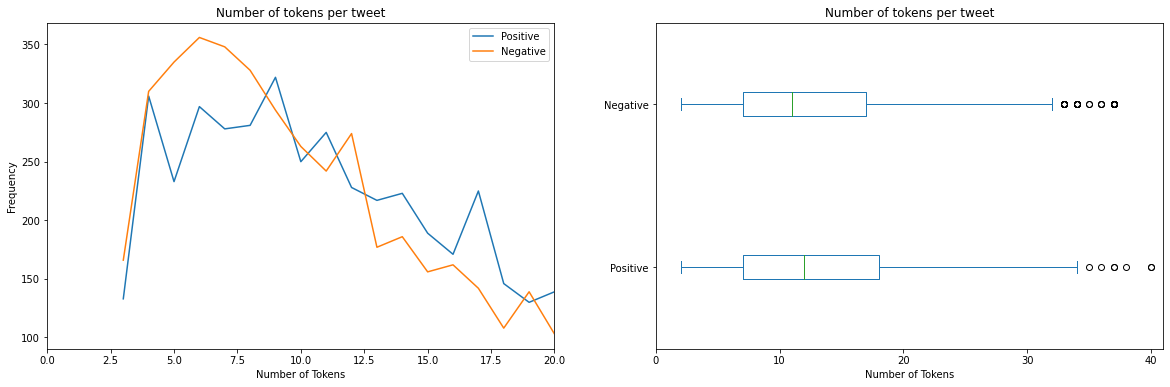

In [6]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Line plot
word_fd.plot(xlabel = "Number of tokens", ylabel = "Frequency", title = "Number of tokens per tweet", figsize = (14,6),xlim=(0,20), ax=ax0) # add to subplot 2
ax0.set_title ('Number of tokens per tweet')
ax0.set_ylabel('Frequency')
ax0.set_xlabel('Number of Tokens')

# Subplot 2: Box plot
tokens.plot(kind='box', vert=False, figsize=(20, 6), ax=ax1, xlim = (0,41), xticks = np.arange(0, 41, 10)) # add to subplot 1
ax1.set_title('Number of tokens per tweet')
ax1.set_xlabel('Number of Tokens')
#ax1.set_ylabel()
plt.savefig('Tweet token count')
plt.show()

In [7]:
pos_tweet_token_words = []
for tweet in pos_tweet_tokens:
    token_words = [token for token in tweet if token.isalpha()]
    pos_tweet_token_words.append(token_words)

neg_tweet_token_words = []
for tweet in neg_tweet_tokens:
    token_words = [token for token in tweet if token.isalpha()]
    neg_tweet_token_words.append(token_words)
    
# Print first five tweet word tokens for positive (blue) and negative (red)  
for i in range(5):
    print('\033[94m',pos_tweet_token_words[i])
    
for i in range(5):
    print('\033[91m',neg_tweet_token_words[i])

 ['for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week']
 ['Hey', 'James', 'How', 'odd', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', 'Many', 'thanks']
 ['we', 'had', 'a', 'listen', 'last', 'night', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', 'When', 'are', 'you', 'in', 'Scotland']
 ['CONGRATS']
 ['yeaaaah', 'yippppy', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', 'in', 'days']
 ['hopeless', 'for', 'tmr']
 ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', 'Shame', 'nearly', 'in', 'months']
 ['That', 'heart', 'sliding', 'into', 'the', 'waste', 'basket']
 ['I', 'hate', 'Japanese', 'call', 'him', 'bani', 'Me', 'too']
 ['Dang', 'starting', 'next', 'week', 'I', 'have', 'work']


In [8]:
pos_words = [len(tweet) for tweet in pos_tweet_token_words]
neg_words = [len(tweet) for tweet in neg_tweet_token_words]

len_words_fd_pos = nltk.FreqDist(pos_words).most_common(20)
len_words_pos_series = pd.Series(dict(len_words_fd_pos))
#print(len_pos_series)

len_words_fd_neg = nltk.FreqDist(neg_words).most_common(20)
len_words_neg_series = pd.Series(dict(len_words_fd_neg))
# sns.lineplot(len_pos_series, len_neg_series)

frame = { 'Positive': len_words_pos_series, 'Negative': len_words_neg_series }
#Creating DataFrame by passing Dictionary
word_fd = pd.DataFrame(frame)
word_fd.head()

words = pd.DataFrame.from_dict({"Positive":pos_words,"Negative": neg_words})
words.describe()

,Positive,Negative
count,5000.000,5000.000
mean,8.780,8.839
std,6.018,6.297
min,0.000,0.000
25%,4.000,4.000
50%,7.000,7.000
75%,13.000,13.000
max,29.000,30.000


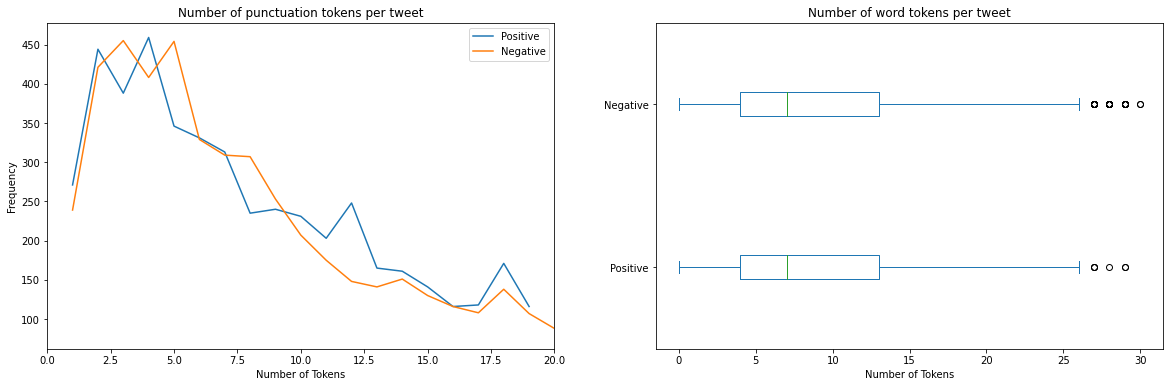

In [9]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Line plot
word_fd.plot(xlabel = "Number of word tokens", ylabel = "Frequency", title = "Number of words per tweet", figsize = (14,6),xlim=(0,20), ax=ax0) # add to subplot 2
ax0.set_title ('Number of punctuation tokens per tweet')
ax0.set_ylabel('Frequency')
ax0.set_xlabel('Number of Tokens')

# Subplot 2: Box plot
words.plot(kind='box', vert=False, figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('Number of word tokens per tweet')
ax1.set_xlabel('Number of Tokens')
#ax1.set_ylabel()
plt.savefig('Tweet word count')
plt.show()

##### The number of words per tweet is similar for positive and negative tweets.

In [10]:
pos_tweet_token_punct = []
for tweet in pos_tweet_tokens:
    token_punct = [token for token in tweet if not token.isalpha()]
    pos_tweet_token_punct.append(token_punct)

neg_tweet_token_punct = []
for tweet in neg_tweet_tokens:
    token_punct = [token for token in tweet if not token.isalpha()]
    neg_tweet_token_punct.append(token_punct)
    
# Print first five tweet word tokens for positive (blue) and negative (red)  
for i in range(5):
    print('\033[94m',pos_tweet_token_punct[i])
    
for i in range(5):
    print('\033[91m',neg_tweet_token_punct[i])

 ['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', ':)']
 ['@Lamb2ja', '!', ':/', '02392441234', ':)', '!']
 ['@DespiteOfficial', ':)', '.', '?', '!']
 ['@97sides', ':)']
 ['!', '!', '!', ':)', '15']
 [':(']
 ['.', "I'm", '19', '2', ':(']
 ['@Hegelbon', '.', ':(']
 ['“', '@ketchBurning', ':', '"', '"', ':(', ':(', '”']
 ['"', '"', ':(']


* **Will need to remove social media tags starting with @**
* **Build freq dist of punct used in positive and negative tweets**

In [11]:
pos_punct = [len(tweet) for tweet in pos_tweet_token_punct]
neg_punct = [len(tweet) for tweet in neg_tweet_token_punct]

len_punct_fd_pos = nltk.FreqDist(pos_punct).most_common()
len_punct_pos_series = pd.Series(dict(len_punct_fd_pos))
#print(len_pos_series)

len_punct_fd_neg = nltk.FreqDist(neg_punct).most_common()
len_punct_neg_series = pd.Series(dict(len_punct_fd_neg))
# sns.lineplot(len_pos_series, len_neg_series)

frame = { 'Positive': len_punct_pos_series, 'Negative': len_punct_neg_series }
#Creating DataFrame by passing Dictionary
punct_fd = pd.DataFrame(frame)
punct_fd.head()

punct = pd.DataFrame.from_dict({"Positive":pos_punct,"Negative": neg_punct})
punct.describe()

,Positive,Negative
count,5000.000,5000.000
mean,4.555,3.838
std,2.605,2.698
min,1.000,1.000
25%,3.000,2.000
50%,4.000,3.000
75%,6.000,5.000
max,50.000,22.000


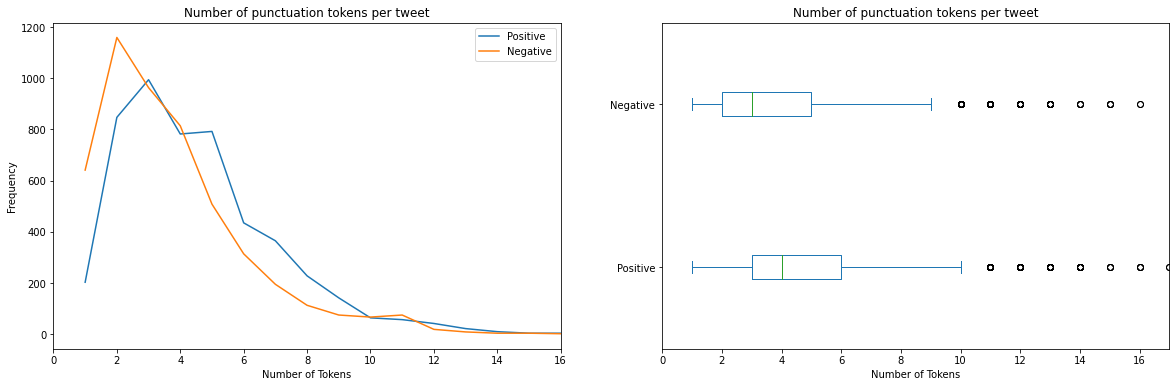

In [12]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Line plot
punct_fd.plot(xlabel = "Number of tokens", ylabel = "Frequency", title = "Number of punctuation per tweet", figsize = (14,6), xlim=(0,16), ax=ax0) # add to subplot 2
ax0.set_title ('Number of punctuation tokens per tweet')
ax0.set_ylabel('Frequency')
ax0.set_xlabel('Number of Tokens')

# Subplot 2: Box plot
ax1 = punct.plot(kind='box', vert=False, figsize=(20, 6), ax=ax1, xlim = (0,17), xticks = np.arange(0, 17, 2)) # add to subplot 1
ax1.set_title('Number of punctuation tokens per tweet')
ax1.set_xlabel('Number of Tokens')
#ax1.set_ylabel()
plt.savefig('Tweet punctuation token count')
plt.show()

In [13]:
#help(nltk.collocations.BigramCollocationFinder)

### Examine common tokens in positive and negative tweets

In [14]:
pos_tweet_tokens = tweets.tokenized(fileids = 'positive_tweets.json')
neg_tweet_tokens = tweets.tokenized(fileids = 'negative_tweets.json')

In [15]:
# Make lists of positive and negative words
pos_words_all = []
for tweet in pos_tweet_tokens:
    for token in tweet:
        pos_words_all.append(token.lower())
    pos_words_all.append("\t\t\t")
        
neg_words_all = []
for tweet in neg_tweet_tokens:
    for token in tweet:
        neg_words_all.append(token.lower())
    neg_words_all.append("\t\t\t")

In [16]:
N = 30
pos_words = nltk.FreqDist(pos_words_all)
top_pos_words = pos_words.most_common(N)

neg_words = nltk.FreqDist(neg_words_all)
top_neg_words = neg_words.most_common(N)

print("COMMON TOKENS \n",'\033[94m',"Positive:",'\t\t\t','\033[91m',"Negative:")
for i in range(1,N):
    print('\033[94m',top_pos_words[i],'\t\t\t','\033[91m',top_neg_words[i])

COMMON TOKENS 
  Positive: 			  Negative:
 (':)', 3691) 			  (':(', 4585)
 ('!', 1844) 			  ('i', 2207)
 ('you', 1463) 			  ('(', 1180)
 ('.', 1341) 			  ('to', 1097)
 ('to', 1093) 			  ('.', 1092)
 ('i', 1093) 			  ('the', 918)
 ('the', 1086) 			  ('!', 831)
 (',', 964) 			  ('my', 744)
 ('a', 934) 			  ('you', 744)
 ('for', 771) 			  (',', 734)
 ('and', 706) 			  ('and', 718)
 (':-)', 701) 			  ('me', 698)
 (':d', 658) 			  ('a', 655)
 ('?', 581) 			  ('?', 644)
 ('my', 555) 			  ('so', 586)
 (')', 525) 			  (':-(', 501)
 ('it', 510) 			  ('it', 501)
 ('in', 504) 			  ('is', 477)
 ('have', 435) 			  ('but', 442)
 ('is', 431) 			  ('in', 432)
 ('of', 411) 			  ('for', 405)
 ('thanks', 392) 			  ('of', 369)
 ('me', 355) 			  ("i'm", 343)
 ('your', 333) 			  ('...', 332)
 ('on', 325) 			  ('have', 329)
 ('follow', 304) 			  ('that', 320)
 ('this', 303) 			  ('this', 319)
 ('...', 290) 			  ('on', 303)
 ('so', 286) 			  ('not', 300)


#### Examine top words

In [17]:
# Make lists of positive and negative words
pos_words_all = []
for tweet in pos_tweet_tokens:
    for token in tweet:
        if token.isalpha():
            pos_words_all.append(token.lower())
    pos_words_all.append("\t\t\t")
        
neg_words_all = []
for tweet in neg_tweet_tokens:
    for token in tweet:
        if token.isalpha():
            neg_words_all.append(token.lower())
    neg_words_all.append("\t\t\t")

In [18]:
N = 30
pos_words = nltk.FreqDist(pos_words_all)
top_pos_words = pos_words.most_common(N)

neg_words = nltk.FreqDist(neg_words_all)
top_neg_words = neg_words.most_common(N)

print("COMMON WORDS \n",'\033[94m',"Positive:",'\t\t\t','\033[91m',"Negative:")
for i in range(1,N):
    print('\033[94m',top_pos_words[i],'\t\t\t','\033[91m',top_neg_words[i])

COMMON WORDS 
  Positive: 			  Negative:
 ('you', 1463) 			  ('i', 2207)
 ('to', 1093) 			  ('to', 1097)
 ('i', 1093) 			  ('the', 918)
 ('the', 1086) 			  ('my', 744)
 ('a', 934) 			  ('you', 744)
 ('for', 771) 			  ('and', 718)
 ('and', 706) 			  ('me', 698)
 ('my', 555) 			  ('a', 655)
 ('it', 510) 			  ('so', 586)
 ('in', 504) 			  ('it', 501)
 ('have', 435) 			  ('is', 477)
 ('is', 431) 			  ('but', 442)
 ('of', 411) 			  ('in', 432)
 ('thanks', 392) 			  ('for', 405)
 ('me', 355) 			  ('of', 369)
 ('your', 333) 			  ('have', 329)
 ('on', 325) 			  ('that', 320)
 ('follow', 304) 			  ('this', 319)
 ('this', 303) 			  ('on', 303)
 ('so', 286) 			  ('not', 300)
 ('that', 275) 			  ('no', 284)
 ('love', 273) 			  ('please', 274)
 ('be', 261) 			  ('be', 245)
 ('thank', 247) 			  ('was', 239)
 ('u', 245) 			  ('just', 238)
 ('good', 234) 			  ('miss', 238)
 ('we', 228) 			  ('too', 227)
 ('with', 228) 			  ('want', 218)
 ('all', 219) 			  ('like', 206)


#### Examine top punctuation

In [19]:
# Make lists of positive and negative words
pos_words_all = []
for tweet in pos_tweet_tokens:
    for token in tweet:
        if not token.isalpha():
            pos_words_all.append(token.lower())
    pos_words_all.append("\t\t\t")
        
neg_words_all = []
for tweet in neg_tweet_tokens:
    for token in tweet:
        if not token.isalpha():
            neg_words_all.append(token.lower())
    neg_words_all.append("\t\t\t")

In [20]:
N = 30
pos_words = nltk.FreqDist(pos_words_all)
top_pos_words = pos_words.most_common(N)

neg_words = nltk.FreqDist(neg_words_all)
top_neg_words = neg_words.most_common(N)

print("COMMON PUNCTUATION TOKENS \n",'\033[94m',"Positive:",'\t\t\t','\033[91m',"Negative:")
for i in range(1,N):
    print('\033[94m',top_pos_words[i],'\t\t\t','\033[91m',top_neg_words[i])

COMMON PUNCTUATION TOKENS 
  Positive: 			  Negative:
 (':)', 3691) 			  (':(', 4585)
 ('!', 1844) 			  ('(', 1180)
 ('.', 1341) 			  ('.', 1092)
 (',', 964) 			  ('!', 831)
 (':-)', 701) 			  (',', 734)
 (':d', 658) 			  ('?', 644)
 ('?', 581) 			  (':-(', 501)
 (')', 525) 			  ("i'm", 343)
 ('...', 290) 			  ('...', 332)
 ('"', 264) 			  ('"', 215)
 (':', 249) 			  (':', 211)
 ('-', 213) 			  ('♛', 210)
 ("i'm", 183) 			  ('》', 210)
 ('&', 174) 			  ("can't", 180)
 ("it's", 162) 			  ("it's", 178)
 (':p', 139) 			  ("don't", 176)
 ('<3', 135) 			  ('-', 125)
 ('..', 129) 			  ('..', 108)
 ("'", 100) 			  ('&', 102)
 ("you're", 94) 			  ('@justinbieber', 93)
 ("i'll", 91) 			  ("i've", 77)
 ('(', 82) 			  ("didn't", 69)
 ("don't", 80) 			  ('*', 67)
 ('*', 73) 			  ("that's", 61)
 ('1', 71) 			  (')', 59)
 ('>', 68) 			  ("'", 55)
 ("that's", 67) 			  ('/', 48)
 ('/', 66) 			  ('>:(', 47)
 ('@jnlazts', 62) 			  ('2', 42)


### Examine common bigrams in positive and negative tweets

In [21]:
# N - number of top bigrams to find
N = 30

# Find N positive bigrams
pos_bigrams = nltk.collocations.BigramCollocationFinder.from_words(pos_words_all)
pos_top_bigrams = pos_bigrams.ngram_fd.most_common(N)

# Find N negative bigrams
neg_bigrams = nltk.collocations.BigramCollocationFinder.from_words(neg_words_all)
neg_top_bigrams = neg_bigrams.ngram_fd.most_common(N)

print("COMMON BIGRAMS \n",'\033[94m',"Positive:",'\t\t\t\t\t','\033[91m',"Negative:")
for i in range(N):
    print('\033[94m',pos_top_bigrams[i],"\t\t\t\t\t",'\033[91m',neg_top_bigrams[i])

COMMON BIGRAMS 
  Positive: 					  Negative:
 ((':)', '\t\t\t'), 2004) 					  ((':(', '\t\t\t'), 2690)
 (('!', ':)'), 558) 					  (('\t\t\t', ':('), 1031)
 (('.', ':)'), 419) 					  ((':(', '('), 647)
 ((':-)', '\t\t\t'), 417) 					  (('(', '\t\t\t'), 561)
 (('!', '!'), 413) 					  (('(', '('), 390)
 ((':d', '\t\t\t'), 409) 					  (('.', ':('), 356)
 (('\t\t\t', ':)'), 381) 					  ((':-(', '\t\t\t'), 311)
 (('\t\t\t', '!'), 227) 					  (('!', '!'), 275)
 ((':)', ')'), 227) 					  (('?', ':('), 237)
 (('?', ':)'), 221) 					  (('!', ':('), 225)
 (('\t\t\t', '.'), 213) 					  (('\t\t\t', '.'), 165)
 ((')', '\t\t\t'), 210) 					  ((',', ':('), 162)
 ((',', ':)'), 179) 					  (('.', '.'), 160)
 (('!', ':d'), 159) 					  (('\t\t\t', ','), 152)
 (('.', '.'), 150) 					  (("i'm", ':('), 140)
 (('.', '\t\t\t'), 146) 					  (('♛', '♛'), 140)
 ((')', ')'), 127) 					  (('》', '》'), 140)
 (('\t\t\t', ','), 123) 					  (('...', ':('), 132)
 ((',', '.'), 123) 					  ((':(', ':('), 124)
 ((':)', ':)'

### Examine common trigrams in positive and negative tweets 

In [22]:
# N - number of top trigrams to find
N = 30

# Find N positive trigrams
pos_trigrams = nltk.collocations.TrigramCollocationFinder.from_words(pos_words_all)
pos_top_trigrams = pos_trigrams.ngram_fd.most_common(N)

# Find N negative trigrams
neg_trigrams = nltk.collocations.TrigramCollocationFinder.from_words(neg_words_all)
neg_top_trigrams = neg_trigrams.ngram_fd.most_common(N)

print("COMMON TRIGRAMS \n",'\033[94m',"Positive:",'\t\t\t\t\t','\033[91m',"Negative:")
for i in range(N):
    print('\033[94m',pos_top_trigrams[i],"\t\t\t",'\033[91m',neg_top_trigrams[i])

COMMON TRIGRAMS 
  Positive: 					  Negative:
 (('!', ':)', '\t\t\t'), 314) 			  (('\t\t\t', ':(', '\t\t\t'), 566)
 (('.', ':)', '\t\t\t'), 283) 			  ((':(', '\t\t\t', ':('), 558)
 ((':)', '\t\t\t', ':)'), 151) 			  ((':(', '(', '('), 347)
 (('\t\t\t', ':)', '\t\t\t'), 127) 			  (('(', '(', '\t\t\t'), 299)
 (('?', ':)', '\t\t\t'), 124) 			  (('.', ':(', '\t\t\t'), 239)
 (('!', '!', ':)'), 119) 			  ((':(', '(', '\t\t\t'), 214)
 (('!', '!', '!'), 118) 			  (('\t\t\t', ':(', '('), 208)
 ((',', ':)', '\t\t\t'), 111) 			  (('?', ':(', '\t\t\t'), 160)
 (('!', ':d', '\t\t\t'), 111) 			  (('!', ':(', '\t\t\t'), 137)
 ((':)', ')', ')'), 96) 			  (('(', '\t\t\t', ':('), 127)
 ((':)', '\t\t\t', '!'), 95) 			  ((',', ':(', '\t\t\t'), 101)
 ((':)', '\t\t\t', '.'), 91) 			  (('!', '!', '!'), 94)
 ((')', ')', '\t\t\t'), 90) 			  ((':(', '\t\t\t', '.'), 88)
 ((':)', ')', '\t\t\t'), 79) 			  ((':(', '\t\t\t', ','), 88)
 (('!', ':-)', '\t\t\t'), 66) 			  (("i'm", ':(', '\t\t\t'), 81)
 (('\t\t\t', '!', 

In [23]:
# N - number of top quadgrams to find
N = 30

# Find N positive quadgrams
pos_quadgrams = nltk.collocations.QuadgramCollocationFinder.from_words(pos_words_all)
pos_top_quadgrams = pos_quadgrams.ngram_fd.most_common(N)

# Find N negative quadgrams
neg_quadgrams = nltk.collocations.QuadgramCollocationFinder.from_words(neg_words_all)
neg_top_quadgrams = neg_quadgrams.ngram_fd.most_common(N)

print("COMMON QUADGRAMS \n",'\033[94m',"Positive:",'\t\t\t\t\t','\033[91m',"Negative:")
for i in range(N):
    print('\033[94m',pos_top_quadgrams[i],"\t",'\033[91m',neg_top_quadgrams[i])

COMMON QUADGRAMS 
  Positive: 					  Negative:
 ((':)', ')', ')', '\t\t\t'), 71) 	  ((':(', '\t\t\t', ':(', '\t\t\t'), 305)
 (('@jnlazts', '&', 'http://t.co/rcvcyyo0iq', ':)'), 62) 	  ((':(', '(', '(', '\t\t\t'), 268)
 (('&', 'http://t.co/rcvcyyo0iq', ':)', '\t\t\t'), 62) 	  (('\t\t\t', ':(', '\t\t\t', ':('), 123)
 (('!', '!', ':)', '\t\t\t'), 62) 	  (('\t\t\t', ':(', '(', '('), 122)
 ((':)', '\t\t\t', ':)', '\t\t\t'), 57) 	  ((':(', '\t\t\t', ':(', '('), 114)
 (('\t\t\t', '!', '@barsandmelody', '@969horan696'), 44) 	  (('(', '(', '\t\t\t', ':('), 78)
 (('!', '@barsandmelody', '@969horan696', '?'), 44) 	  (('(', '\t\t\t', ':(', '\t\t\t'), 64)
 (('@barsandmelody', '@969horan696', '?', ':)'), 44) 	  (('\t\t\t', '.', ':(', '\t\t\t'), 53)
 (('@969horan696', '?', ':)', '<3'), 44) 	  ((',', '@justinbieber', ':(', '\t\t\t'), 52)
 (('?', ':)', '<3', '<3'), 44) 	  (('\t\t\t', ':(', '(', '\t\t\t'), 51)
 (('\t\t\t', '.', '1', ':)'), 44) 	  (('.', ':(', '\t\t\t', ':('), 50)
 ((',', '.', ':)', '\t\

### Preprocessing required 

#### Remove
* tags
* common words
* links

#### Add features
* presence of emoticons 
* collocations
* tokens/ per tweet
* punctuation / per tweet

## NLTK built-in pre-trained sentiment analyser
### 1. Load datasets
### 2. Preprocess
### 3. Train-test-split
### 4. Analyse sentiment
### 5. Evaluate

In [24]:
# Instantiate NLTK SentimentIntensityAnalyzer (imported as Sia)
sia = SentimentIntensityAnalyzer()
# help(sia)
sia.polarity_scores("I like that")

{'neg': 0.000, 'neu': 0.286, 'pos': 0.714, 'compound': 0.361}

In [25]:
from random import shuffle
def is_positive(tweet:str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0

In [26]:
# Load twitter data as strings
pos_tweets = tweets.strings('positive_tweets.json')
neg_tweets = tweets.strings('negative_tweets.json')

# Label each tweet and store in dataframes with labels
df_pos_tweets = pd.DataFrame({"Tweet":[tweet for tweet in pos_tweets],"Label":[1 for tweet in pos_tweets]})
df_neg_tweets = pd.DataFrame({"Tweet":[tweet for tweet in neg_tweets],"Label":[0 for tweet in neg_tweets]})

# Stack the two DataFrames together to make one labelled dataset
# 1 - positive, 0 - negative
df_all_tweets = pd.concat([df_pos_tweets,df_neg_tweets], ignore_index=True)


In [27]:
from numpy import random

In [28]:
# Copy the dataframe containing all labelled tweets and add a column to store sia prediction
sia_all_tweets = df_all_tweets.copy()
sia_all_tweets["Random"] = random.binomial(n=1, p=.5, size=10000)
sia_all_tweets["Random_true"] = -1
sia_all_tweets["Sia"] = -1
sia_all_tweets["Sia_true"] = -1

for index, tweet in enumerate(sia_all_tweets.Tweet):
    prediction = is_positive(tweet)
    sia_all_tweets.at[index,'Sia'] = int(prediction)
    sia_all_tweets.at[index,'Sia_true'] = int(prediction==sia_all_tweets.loc[index,"Label"])
    sia_all_tweets.at[index, 'Random_true'] = int(sia_all_tweets.loc[index,"Random"]==sia_all_tweets.loc[index,"Label"])

sia_all_tweets
#print(sia_all_tweets.describe())
#print(sia_all_tweets.head())
#for tweet in sia_all_tweets:

,Tweet,Label,Random,Random_true,Sia,Sia_true
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,1,1,1,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,0,0,1,1
2,@DespiteOfficial we had a listen last night :)...,1,0,0,1,1
3,@97sides CONGRATS :),1,1,1,1,1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,0,0,1,1
...,...,...,...,...,...,...
9995,I wanna change my avi but uSanele :(,0,0,1,0,1
9996,MY PUPPY BROKE HER FOOT :(,0,0,1,0,1
9997,where's all the jaebum baby pictures :((,0,0,1,0,1
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0,0,1,0,1


The accuracy of the NLTK built in sentiment analyser for tweet_samples data is 85.7% (n = 10,000)

#### Built in sentiment analyser on movie reviews

In [29]:
movies = nltk.corpus.movie_reviews
print(movies.categories())

# Store fileids for positive and negative movie reviews
pos_movie_ids = movies.fileids(categories = "pos")
neg_movie_ids = movies.fileids(categories = "neg")

# Combine fileids and create lables for each fileid
all_movie_ids = pos_movie_ids + neg_movie_ids
all_movie_labels = [1 if label[:3] == "pos" else 0 for label in all_movie_ids]

print("There are {} positive and {} negative movie reviews.".format(len(pos_movie_ids),len(neg_movie_ids)))

# print(type(movies.raw(fileids= pos_movie_ids[0])))
# To get the movie review as string
# movies.raw(fileids= pos_movie_ids[0])

# Make a dataframe with movie ids and label for each id
df_movies = pd.DataFrame({"Movie_id":all_movie_ids,"Label":all_movie_labels})

['neg', 'pos']
There are 1000 positive and 1000 negative movie reviews.


In [30]:
from statistics import mean, median, mode
def is_positive_review(review_id: str) -> bool:
    """True if the average of all sentence compound scores is positive."""
    text = movies.raw(review_id)
    scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(text)]
    return median(scores) > 0

In [31]:
# Make a copy of the dataframe and intialise columns for sia classifier
sia_movies = df_movies.copy()
sia_movies["Sia"] = -1
sia_movies["Sia_true"] = -1

for index, movie_id in enumerate(sia_movies.Movie_id):
    prediction = is_positive_review(movie_id)
    sia_movies.at[index,'Sia'] = int(prediction)
    sia_movies.at[index,'Sia_true'] = int(prediction==sia_movies.loc[index,"Label"])
    #sia_movies.at[index, 'Random_true'] = int(sia_movies.loc[index,"Random"]==sia_movies.loc[index,"Label"])

sia_movies.describe()


,Label,Sia,Sia_true
count,2000.0,2000.000,2000.000
mean,0.5,0.368,0.651
std,0.5,0.482,0.477
min,0.0,0.000,0.000
25%,0.0,0.000,0.000
50%,0.5,0.000,1.000
75%,1.0,1.000,1.000
max,1.0,1.000,1.000


## Comparing Additional Classifiers

In [32]:
# Instantiate classifiers, make a mapping of names to instances
classifiers = {
    "BernoulliNB": sklearn.naive_bayes.BernoulliNB(),
    "ComplementNB": sklearn.naive_bayes.ComplementNB(),
    "MultinomialNB": sklearn.naive_bayes.ComplementNB(),
    "KNeighborsClassifier": sklearn.neighbors.KNeighborsClassifier(),
    "DecisionTreeClassifier": sklearn.tree.DecisionTreeClassifier(),
    "RandomForestClassifier": sklearn.ensemble.RandomForestClassifier(),
    "AdaBoostClassifier": sklearn.ensemble.AdaBoostClassifier(),
    "LogisticRegression": sklearn.linear_model.LogisticRegression(),
    "MLPClassifier": sklearn.neural_network.MLPClassifier(),
    "QuadraticDiscriminantAnalysis": sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
}

In [33]:
#movie_y.columns
#movie_y = movie_data.Label
#movie_features = ["Sia","",""]
#movie_X  = movie_data[movie_feaures]
#movie_X.describe()
#movie_X.head()



In [34]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

pos_movie_words = [word for word, tag in filter(skip_unwanted, nltk.pos_tag(nltk.corpus.movie_reviews.words(categories = ["pos"])))]
neg_movie_words = [word for word, tag in filter(skip_unwanted, nltk.pos_tag(nltk.corpus.movie_reviews.words(categories = ["neg"])))]

pos_movie_word_fd = nltk.FreqDist(pos_movie_words)
neg_movie_word_fd = nltk.FreqDist(neg_movie_words)

common_movie_word_set = set(pos_movie_word_fd).intersection(neg_movie_word_fd)

for word in common_movie_word_set:
    del pos_movie_word_fd[word]
    del neg_movie_word_fd[word]

# Top N words
N = 500
top_100_pos_movie_words = {word for word, count in pos_movie_word_fd.most_common(N)}
top_100_neg_movie_words = {word for word, count in neg_movie_word_fd.most_common(N)}

In [35]:
def extract_movie_features(text):
    movie_features = {}
    wordcount = 0
    compound_scores = list()
    positive_scores = list()
    n_tokens = len(list(nltk.word_tokenize(text)))
    n_types = len(set(nltk.word_tokenize(text)))
    lexical_diversity = n_types/n_tokens
    
    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_pos_movie_words:
                #wordcount += 1
                wordcount += pos_movie_word_fd[word]
                # here can modify to increment by frequency of word in FreqDist
    
    compound_scores.append(sia.polarity_scores(sentence)["compound"])
    positive_scores.append(sia.polarity_scores(sentence)["pos"])
    
    # Add 1 to final compound score to ensure it is always positive
    # to satisfy some classifiers requirements later.
    movie_features["mean_compound"] = mean(compound_scores) + 1
    movie_features["mean_positive"] = mean(positive_scores)
    movie_features["wordcount"] = wordcount
    movie_features["token_count"] = n_tokens
    movie_features["type_count"] = n_types
    movie_features["lexical_diversity"] = lexical_diversity
    
    return movie_features

In [36]:
# movies_feautres is a list of tuples, 
# each tuple contains a dictionary of features and a label
movie_ids = nltk.corpus.movie_reviews.fileids()
movies_features = [
    (extract_movie_features(nltk.corpus.movie_reviews.raw(fileid)),fileid[:3])
    for fileid in movie_ids
]

In [37]:
# Train and test split is 4:1
train_count = len(movies_features)//5



# Create dictionary and initialise keys, and empty lists as values to store accuracy scores
movie_accuracy = {key: [] for key in classifiers.keys()}

# repeat M times
M = 10
for i in range(M):
    # Features are shuffled
    shuffle(movies_features)
    # For each sklearn classifier train and test the model, store accuracy
    for name, sklearn_classifier in classifiers.items():
        classifier = nltk.classify.SklearnClassifier(sklearn_classifier, sparse=False)
        classifier.train(movies_features[:train_count])
        accuracy = nltk.classify.accuracy(classifier, movies_features[train_count:])

        # Accuracy as percentage 2dp
        movie_accuracy[name].append(round(100*accuracy,2))

# Results
print("Analysis complete")
for key,value in movie_accuracy.items():
    print(key, ": ",value)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Analysis complete
BernoulliNB :  [62.88, 65.94, 65.81, 66.56, 66.44, 65.62, 65.19, 66.81, 64.81, 65.94]
ComplementNB :  [72.62, 72.81, 72.81, 72.94, 73.94, 71.88, 72.69, 73.81, 74.0, 71.31]
MultinomialNB :  [72.62, 72.81, 72.81, 72.94, 73.94, 71.88, 72.69, 73.81, 74.0, 71.31]
KNeighborsClassifier :  [61.81, 60.56, 62.38, 60.19, 61.12, 61.75, 62.38, 61.75, 61.94, 59.5]
DecisionTreeClassifier :  [68.0, 69.69, 69.44, 70.06, 66.62, 68.12, 64.25, 66.62, 64.12, 67.0]
RandomForestClassifier :  [72.56, 73.38, 74.25, 74.62, 74.38, 74.44, 69.88, 73.56, 70.75, 72.19]
AdaBoostClassifier :  [70.75, 71.5, 72.12, 73.88, 71.94, 71.25, 69.12, 70.69, 71.69, 70.5]
LogisticRegression :  [75.88, 75.38, 75.62, 76.69, 75.06, 74.44, 75.44, 76.62, 74.81, 76.25]
MLPClassifier :  [74.88, 73.62, 73.62, 74.0, 73.56, 72.69, 73.5, 75.56, 73.56, 74.0]
QuadraticDiscriminantAnalysis :  [71.69, 72.88, 72.62, 71.0, 69.38, 71.56, 70.19, 71.06, 72.81, 70.5]


In [38]:
movie_experiment_3 = pd.DataFrame(movie_accuracy)

In [39]:
pd.set_option('precision',2)
movie_experiment_3.describe()
#movie_experiment_1

,BernoulliNB,ComplementNB,MultinomialNB,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,LogisticRegression,MLPClassifier,QuadraticDiscriminantAnalysis
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,65.60,72.88,72.88,61.34,67.39,73.00,71.34,75.62,73.90,71.37
std,1.13,0.87,0.87,0.97,2.09,1.64,1.25,0.75,0.80,1.17
min,62.88,71.31,71.31,59.50,64.12,69.88,69.12,74.44,72.69,69.38
25%,65.30,72.64,72.64,60.70,66.62,72.28,70.70,75.14,73.56,70.62
50%,65.88,72.81,72.81,61.75,67.50,73.47,71.38,75.53,73.62,71.31
75%,66.31,73.59,73.59,61.91,69.11,74.35,71.88,76.16,74.00,72.39
max,66.81,74.00,74.00,62.38,70.06,74.62,73.88,76.69,75.56,72.88


In [40]:
# Create lists for the plot
x_pos = np.arange(len(classifiers))

# Get the mean accuracy scores
accuracy_mean = list(movie_experiment_3.describe().loc["mean",:])

# Get the standard deviation of accuracy scores
accuracy_sd = list(movie_experiment_3.describe().loc["std",:])

In [41]:
df_movie_experiment_3 = pd.DataFrame(columns = classifiers.keys())
df_movie_experiment_3.loc[len(df_movie_experiment_3)] = accuracy_mean
df_movie_experiment_3.loc[len(df_movie_experiment_3)] = accuracy_sd
df_movie_experiment_3.index = ["Mean","SD"]
df_movie_experiment_3

,BernoulliNB,ComplementNB,MultinomialNB,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,LogisticRegression,MLPClassifier,QuadraticDiscriminantAnalysis
Mean,65.60,72.88,72.88,61.34,67.39,73.00,71.34,75.62,73.9,71.37
SD,1.13,0.87,0.87,0.97,2.09,1.64,1.25,0.75,0.8,1.17


In [42]:
df_movie_experiment_3.to_csv('Movie_experiment_3_summary.csv')
df_movie_experiment_3.to_pickle('Movie_experiment_3_summary.pkl')

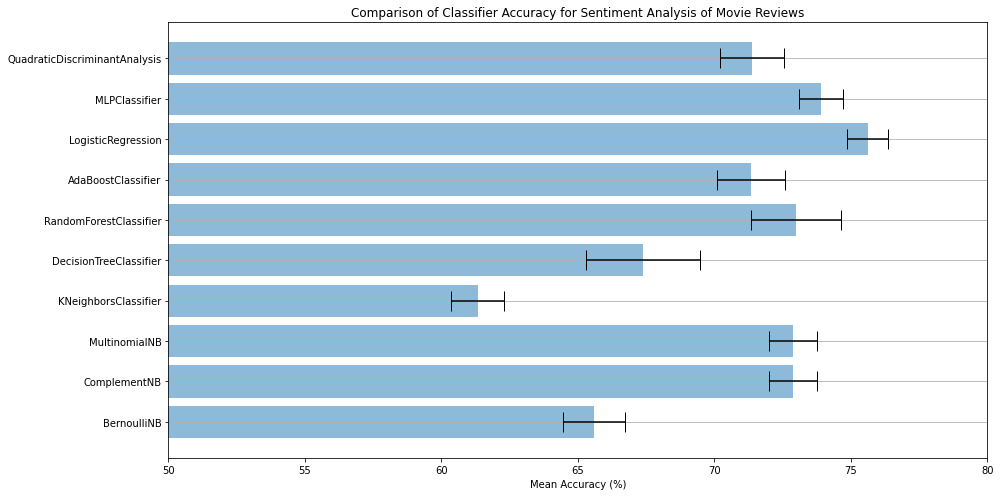

In [43]:
# Build the plot
fig, ax = plt.subplots(figsize = (14,7))
ax.barh(x_pos, accuracy_mean, xerr=accuracy_sd, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xlim((50,80))
ax.set_xlabel('Mean Accuracy (%)')
ax.set_yticks(x_pos)
ax.set_yticklabels(classifiers.keys())
ax.set_title('Comparison of Classifier Accuracy for Sentiment Analysis of Movie Reviews')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Movie_experiment_3_accuracy.png')
plt.show()

## Conclusioin
* The Logistic regression classifier is the best performing model for sentiment analysis of movie reviews.
* Building a frequency distribution of common words in positive reviews, with a higher number of words, increases the performance.



In [44]:
'''
# Build frequency distributio of words 
fd = nltk.FreqDist(words)
common_words = fd.most_common(50)
plt.figure(figsize = (15,6))
fd.plot(50,cumulative=True)
plt.show()
print(common_words)
'''

'\n# Build frequency distributio of words \nfd = nltk.FreqDist(words)\ncommon_words = fd.most_common(50)\nplt.figure(figsize = (15,6))\nfd.plot(50,cumulative=True)\nplt.show()\nprint(common_words)\n'

In [45]:
#custom_stopwords = [w.lower() for (w,freq) in common_words]
#print(custom_stopwords)
#w_out_custom_stopwords = [w for w in words if w.lower() not in custom_stopwords]
#print(len(w_out_custom_stopwords))

In [46]:
# Maybe remove some step words that could be useful in sentiment analysis
#print(sorted(stopwords))
# nor not no against aren't won't wouldn't would shouldn't souldn off down
# above
